This script finds eigen species and plot the result

In [1]:
# This script finds eigen species and plot the result
import os
import sys
plist = ['ACVD',
 'BD',
 'CRC',
 'IBD',
 'IGT',
 'CFS',
 'STH',
 'T2D',
 'adenoma',
 'asthma',
 'carcinoma_surgery_history',
 'hypertension',
 'migraine',
 'schizofrenia']
outer = '../data'
cluster = '../result/GCN_fix_tree/leaves_cluster.tsv'
outdir = '../result/large_scale_cohort/'
if not os.path.exists(outdir):
    os.makedirs(outdir)


In [2]:

# check if Rscript exists
python_executable = sys.executable
python_dir = os.path.dirname(python_executable)
rscript_path = os.path.join(python_dir, 'Rscript')
if os.path.exists(rscript_path):
    print(f"Rscript path: {rscript_path}")
else:
    print(f"Could not find Rscript in Python directory: {rscript_path}")
    print("Please ensure R is installed in your conda environment")

python_executable = sys.executable
print(f"Python executable: {python_executable}")

Rscript path: /home/chelijia/anaconda3/envs/meta_fr_r/bin/Rscript
Python executable: /home/chelijia/anaconda3/envs/meta_fr_r/bin/python


In [3]:
def run_command(cmd):
    print(f"Executing: {cmd}")
    exit_code = os.system(cmd)
    if exit_code != 0:
        print(f"Command failed with exit code: {exit_code}")
    return exit_code

for p in plist:
    for cohort in os.listdir(os.path.join(outer, p)):
        #od = os.path.join(outdir, p, cohort, 'eigenspecies')
        od = f'{outdir}/{p}/{cohort}/eigenspecies'
        if not os.path.exists(od):
            os.makedirs(od)
        
        tmp1 = f'"{python_executable}" run_eigenspecies_together_COHORT.py --pheno {p} --prefix {cohort} --idir {outer} --odir {od} --cluster {cluster}'
        print(tmp1)
        e = run_command(tmp1)

        tmp2 = f'"{rscript_path}" run_preservation_COHORT.R {cohort}.health {cohort}.disease {cohort} {od}'
        print(tmp2)
        e = run_command(tmp2)

        tmp3 = f'"{python_executable}" run_numeric_eigen_COHORT.py --pheno {p} --prefix {cohort} --idir {outer} --odir {od}'
        print(tmp3)
        e = run_command(tmp3)
        
        

"/home/chelijia/anaconda3/envs/meta_fr_r/bin/python" run_eigenspecies_together_COHORT.py --pheno ACVD --prefix ACVD1 --idir ../data --odir ../result/large_scale_cohort//ACVD/ACVD1/eigenspecies --cluster ../result/GCN_fix_tree/leaves_cluster.tsv
Executing: "/home/chelijia/anaconda3/envs/meta_fr_r/bin/python" run_eigenspecies_together_COHORT.py --pheno ACVD --prefix ACVD1 --idir ../data --odir ../result/large_scale_cohort//ACVD/ACVD1/eigenspecies --cluster ../result/GCN_fix_tree/leaves_cluster.tsv
"/home/chelijia/anaconda3/envs/meta_fr_r/bin/Rscript" run_preservation_COHORT.R ACVD1.health ACVD1.disease ACVD1 ../result/large_scale_cohort//ACVD/ACVD1/eigenspecies
Executing: "/home/chelijia/anaconda3/envs/meta_fr_r/bin/Rscript" run_preservation_COHORT.R ACVD1.health ACVD1.disease ACVD1 ../result/large_scale_cohort//ACVD/ACVD1/eigenspecies
"/home/chelijia/anaconda3/envs/meta_fr_r/bin/python" run_numeric_eigen_COHORT.py --pheno ACVD --prefix ACVD1 --idir ../data --odir ../result/large_scale_c

In [4]:
import glob
import pandas as pd

# find all files
search_pattern = os.path.join(outdir, '*', '*', 'eigenspecies', '*.FRC_correlation.tsv')

# find all matching files
files = glob.glob(search_pattern)

print(f"Found {len(files)} files to process")

Found 28 files to process


In [5]:
# to store all files
dfs = []

# read files
for file_path in files:
    try:
        # read tsv
        df = pd.read_csv(file_path, sep='\t')
        dfs.append(df)
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")


combined_df = pd.concat(dfs, ignore_index=True)

In [6]:
combined_df.head()

,module,column,project,correlation,p-value,FDR p-value
0,S1_C1,age,ACVD1,-0.028444,0.581428,0.826718
1,S1_C1,number_reads,ACVD1,-0.046315,0.364780,0.706177
2,S1_C1,number_bases,ACVD1,-0.013039,0.798713,0.938704
3,S1_C1,BMI,ACVD1,0.043192,0.446392,0.763315
4,S1_C1,urea_nitrogen,ACVD1,-0.171327,0.144418,0.513415


In [7]:
filtered_df = combined_df[
    (combined_df['correlation'].abs() > 0.2) & 
    (combined_df['FDR p-value'] < 0.05)
]

Occurrences of each element in the column:
age                                   15
number_reads                          10
number_bases                          10
days_from_first_collection             8
glucose                                7
visit_number                           6
globulin                               6
BMI                                    6
rbc                                    5
alt                                    5
ast                                    4
albumine                               4
hdl                                    4
bilubirin                              3
hba1c                                  3
ldl                                    3
age_twins_started_to_live_apart        3
hscrp                                  3
urea_nitrogen                          3
wbc                                    3
triglycerides                          2
cholesterol                            2
glp_1                                  2
mgs_richness  

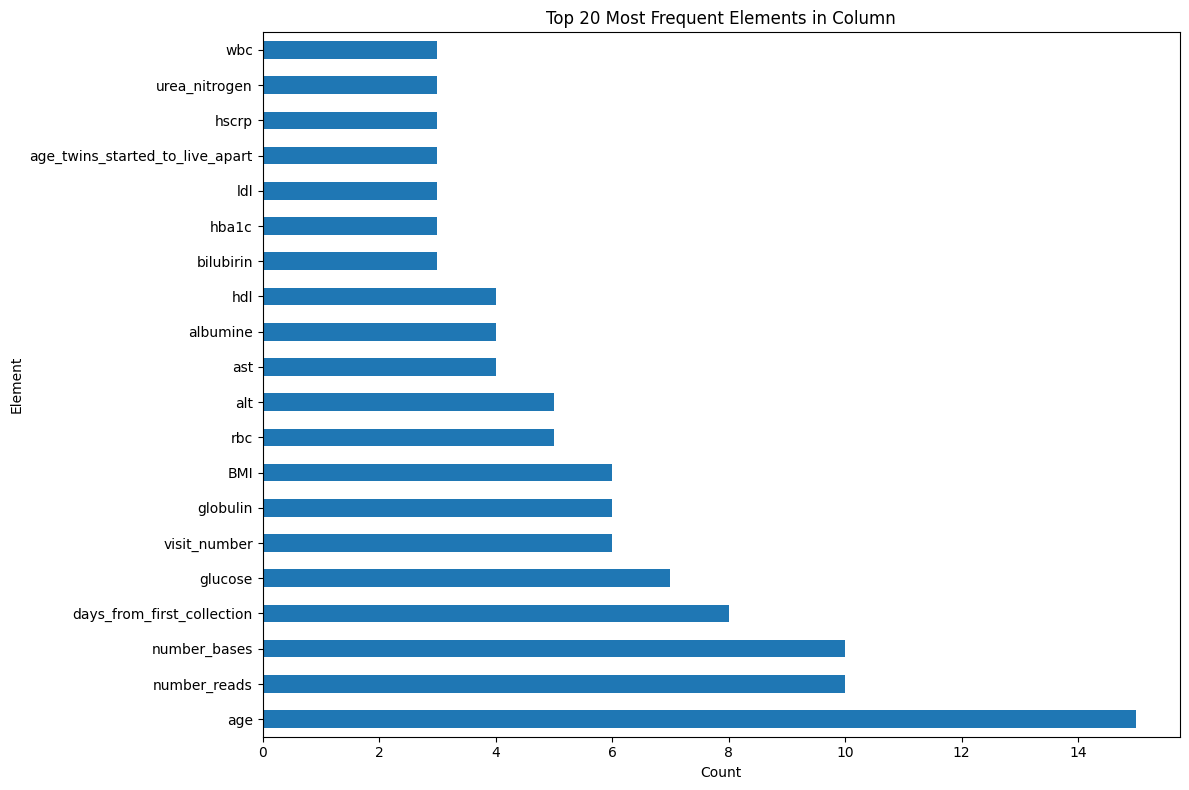

In [8]:
# Count occurrences of each element in the column
column_counts = filtered_df['column'].value_counts()
print("Occurrences of each element in the column:")
print(column_counts)

# Visualize the column counts (top 20)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
column_counts.head(20).plot(kind='barh')
plt.title('Top 20 Most Frequent Elements in Column')
plt.xlabel('Count')
plt.ylabel('Element')
plt.tight_layout()
plt.show()



Occurrences of each module in the column:
S1_C1     12
S1_C9     11
S1_C16    11
S1_C3     10
S1_C15    10
S1_C2      8
S1_C5      8
S1_C17     8
S2_C4      7
S1_C20     7
S1_C10     7
S6_C1      6
S6_C3      6
S2_C5      5
S1_C24     4
S1_C8      3
S3_C1      3
S1_C14     1
S5_C2      1
Name: module, dtype: int64


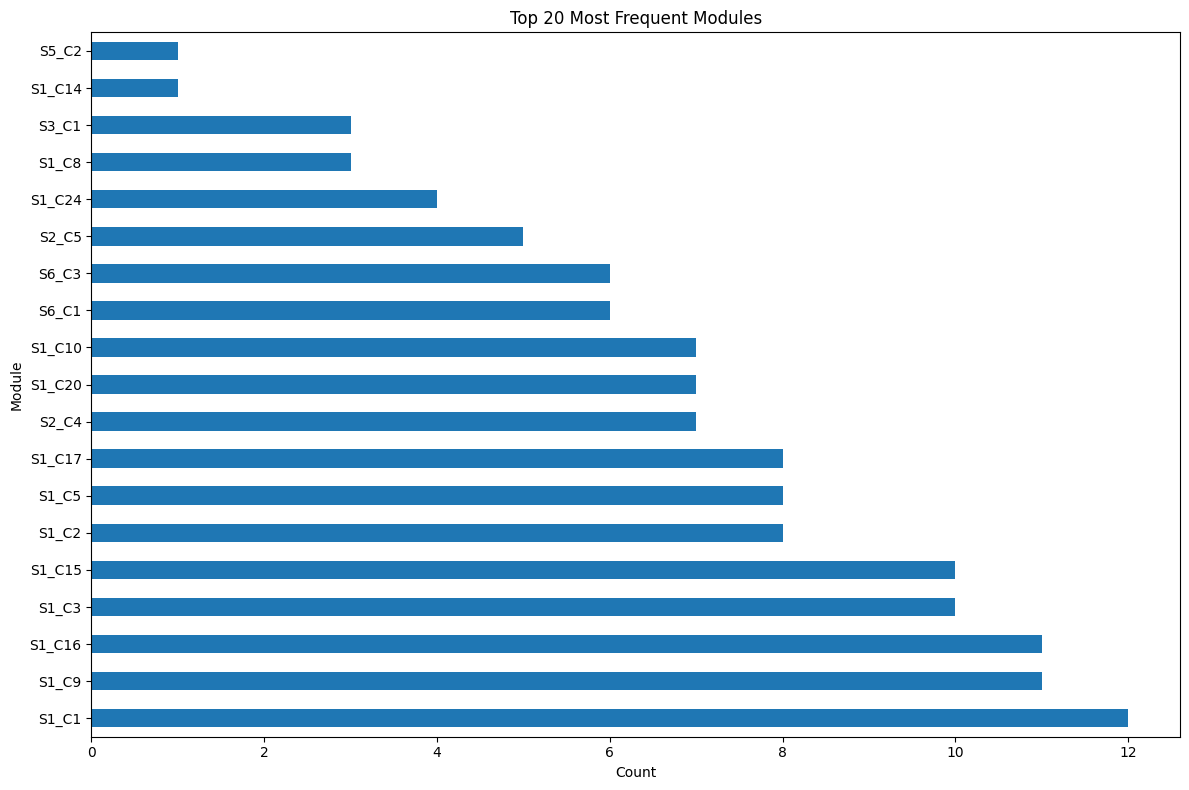

In [10]:
# Count occurrences of each element in the module column
module_counts = filtered_df['module'].value_counts()
print("\nOccurrences of each module in the column:")
print(module_counts)

# Visualize the module counts (top 20)
plt.figure(figsize=(12, 8))
module_counts.head(20).plot(kind='barh')
plt.title('Top 20 Most Frequent Modules')
plt.xlabel('Count')
plt.ylabel('Module')
plt.tight_layout()
plt.show()

<ipython-input-11-a2a191c7eceb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['module_column_pair'] = filtered_df['module'] + ' & ' + filtered_df['column']


Total 120 different module-column combinations

Top 20 Most Frequent Module-Column Combinations:
S1_C9 & age                                3
S6_C3 & age_twins_started_to_live_apart    2
S1_C16 & age                               2
S1_C9 & BMI                                2
S1_C1 & age                                2
S2_C4 & number_bases                       2
S2_C4 & number_reads                       2
S1_C3 & triglycerides                      1
S1_C3 & alt                                1
S1_C3 & ast                                1
S1_C20 & ast                               1
S1_C3 & number_bases                       1
S1_C3 & number_reads                       1
S1_C24 & urea_nitrogen                     1
S1_C24 & alt                               1
S1_C3 & hdl                                1
S1_C24 & age                               1
S1_C20 & glucose                           1
S1_C20 & globulin                          1
S1_C2 & wbc                                1
Nam

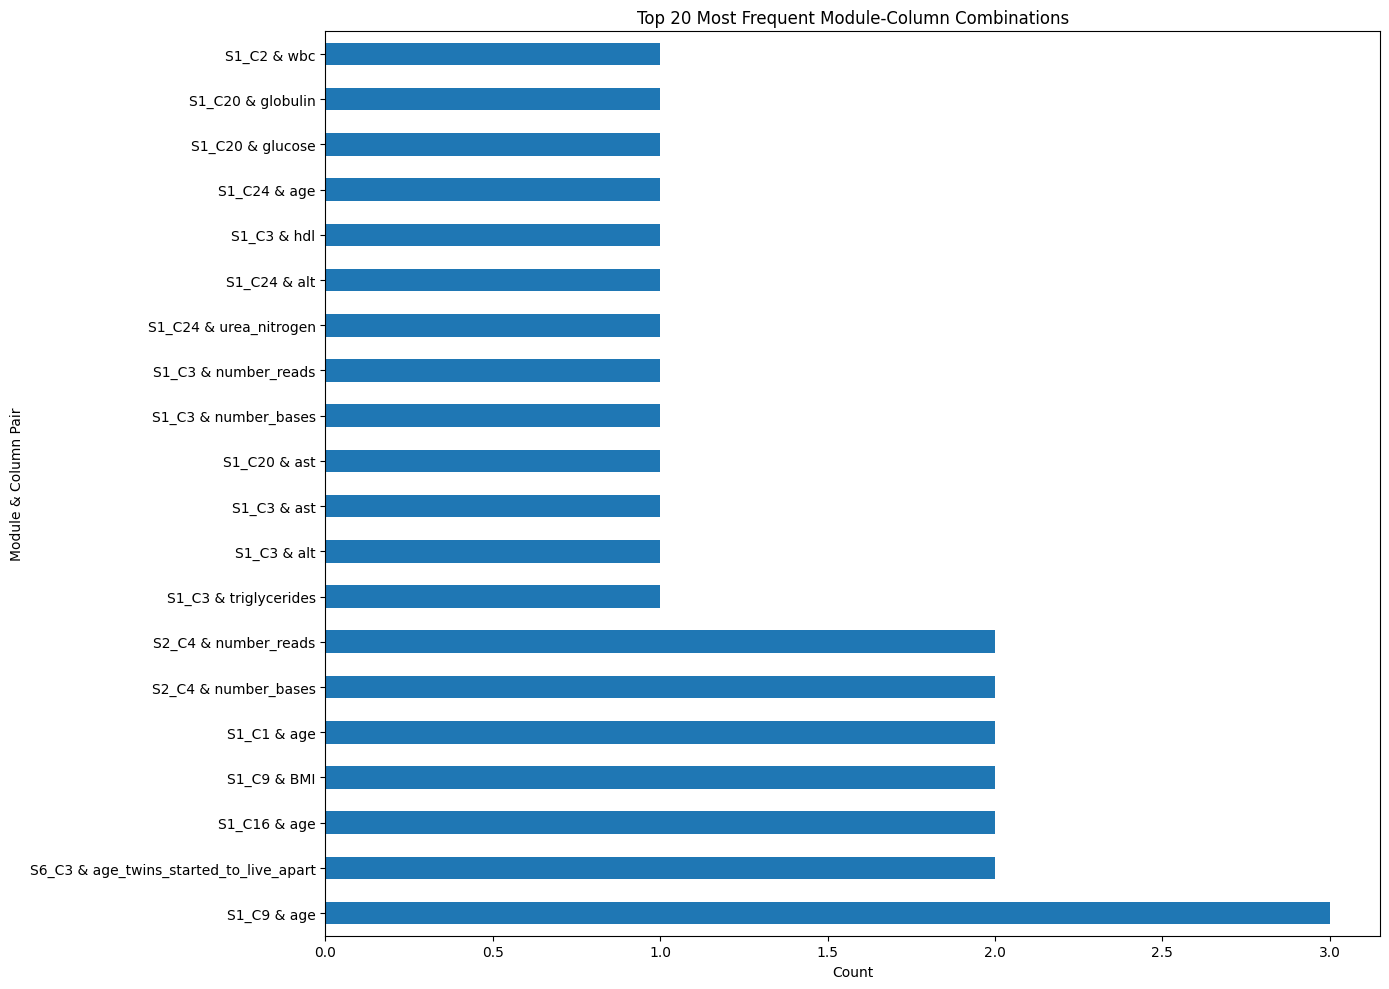

In [11]:
# Create a new column that combines module and column
filtered_df['module_column_pair'] = filtered_df['module'] + ' & ' + filtered_df['column']

# Count occurrences of each combination
pair_counts = filtered_df['module_column_pair'].value_counts()

print(f"Total {len(pair_counts)} different module-column combinations")
print("\nTop 20 Most Frequent Module-Column Combinations:")
print(pair_counts.head(20))

# Visualize the top 20 most common combinations
plt.figure(figsize=(14, 10))
pair_counts.head(20).plot(kind='barh')
plt.title('Top 20 Most Frequent Module-Column Combinations')
plt.xlabel('Count')
plt.ylabel('Module & Column Pair')
plt.tight_layout()
plt.show()


In [12]:
# 1. extract age rows
age_filtered = filtered_df[filtered_df['column'] == 'age'].copy()
# 2. extract BMI rows
bmi_filtered = filtered_df[filtered_df['column'] == 'BMI'].copy()
# 3. extract rows where column is neither 'age' nor 'BMI'
other_filtered = filtered_df[~filtered_df['column'].isin(['age', 'BMI'])].copy()

# Define a function to format the DataFrame
def format_df(df):
    # create cluster
    df['cluster'] = df['column'] + '_' + df['project']
    # select and rename columns
    formatted = df[['cluster', 'module', 'correlation', 'FDR p-value']].copy()
    formatted.columns = ['phenotype', 'FRC', 'correlation', 'pvalue']
    return formatted

# Apply the formatting function to each filtered DataFrame
age_df = format_df(age_filtered)
bmi_df = format_df(bmi_filtered)
other_df = format_df(other_filtered)

In [13]:
os.mkdir('../result/large_scale_cohort/phenotpye/')
age_df.to_csv('../result/large_scale_cohort/phenotpye/age_FRC.corrlation.tsv', sep='\t', index=False)
bmi_df.to_csv('../result/large_scale_cohort/phenotpye/bmi_FRC.corrlation.tsv', sep='\t', index=False)
other_df.to_csv('../result/large_scale_cohort/phenotpye/other_FRC.corrlation.tsv', sep='\t', index=False)

In [14]:
bmi_df

,phenotype,FRC,correlation,pvalue
1905,BMI_IBD1,S1_C1,-0.203627,8.110854e-04
1933,BMI_IBD1,S1_C16,-0.216383,2.940653e-04
2003,BMI_IBD1,S2_C5,-0.219488,2.566766e-04
2138,BMI_IBD3,S1_C10,0.236791,1.351240e-07
2192,BMI_IBD3,S1_C9,0.296743,1.697512e-11
3265,BMI_STH1,S1_C9,0.293870,1.634375e-02


In [15]:
other_df[other_df["FRC"]=="S2_C4"]

,phenotype,FRC,correlation,pvalue
1432,number_reads_CRC5,S2_C4,-0.404772,9.235713e-04
1433,number_bases_CRC5,S2_C4,-0.388448,1.099003e-03
2491,number_reads_IGT1,S2_C4,0.394680,1.127477e-02
2492,number_bases_IGT1,S2_C4,0.394601,1.127477e-02
3584,c_peptide_T2D1,S2_C4,0.453034,4.526741e-04
3585,glucose_T2D1,S2_C4,0.460833,4.526741e-04
3588,glp_1_T2D1,S2_C4,0.589792,5.630163e-07
